# 첫 번째 심층 신경망

## 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

## 데이터 적재

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## 모델 만들기

In [6]:
input_layer = Input((32, 32, 3))

x = Flatten()(input_layer)
x = Dense(200, activation='relu')(x)
x = Dense(150, activation='relu')(x)

output_layer = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## Model Compilation

In [8]:
opt = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Model Fit

In [9]:
model.fit(x_train, y_train,
          batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 4s 1ms/step - loss: 1.8510 - accuracy: 0.3321
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6754 - accuracy: 0.3998
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5855 - accuracy: 0.4331
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5303 - accuracy: 0.4576
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4918 - accuracy: 0.4702
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4571 - accuracy: 0.4810
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.4323 - accuracy: 0.4915
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4066 - accuracy: 0.4972
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3831 - accuracy: 0.5080
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.361

## Model Evaluation

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4887 - accuracy: 0.4756


[1.488706350326538, 0.475600004196167]

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

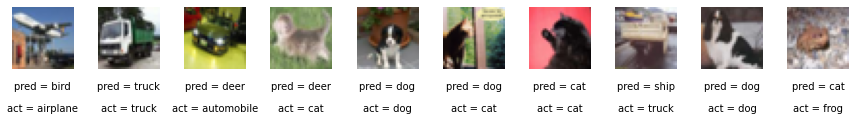

In [12]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
